In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import imblearn
import warnings
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [94]:
train_df=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\ltfs data file\\train.csv",index_col="UniqueID")

In [95]:
test_df=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\ltfs data file\\test_bqCt9Pv.csv",index_col="UniqueID")

In [96]:
observed_df=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\ltfs data file\\sample_submission_24jSKY6.csv",index_col="UniqueID")

In [97]:
loan_default=observed_df

In [98]:
#test_df['Observed_df']=observed_df
train_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [99]:
test_df.shape

(112392, 39)

Text(0.5, 1.0, 'Loan Default Count_plot for LTFS DATA')

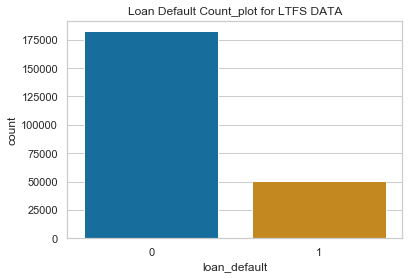

In [100]:
sns.countplot(x='loan_default',data=train_df,palette='colorblind')
plt.title('Loan Default Count_plot for LTFS DATA')

In [101]:
train_df['asset_cost'].min()

37000

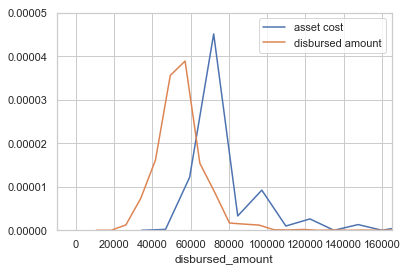

In [102]:
sns.distplot(train_df['asset_cost'], hist=False,label='asset cost')
sns.distplot(train_df['disbursed_amount'], hist=False,label='disbursed amount')
plt.xlim((-10000,165000))
plt.ylim((0,0.00005))
plt.legend(loc='best')

Text(0, 0.5, 'Loan Defaulter in proportion')

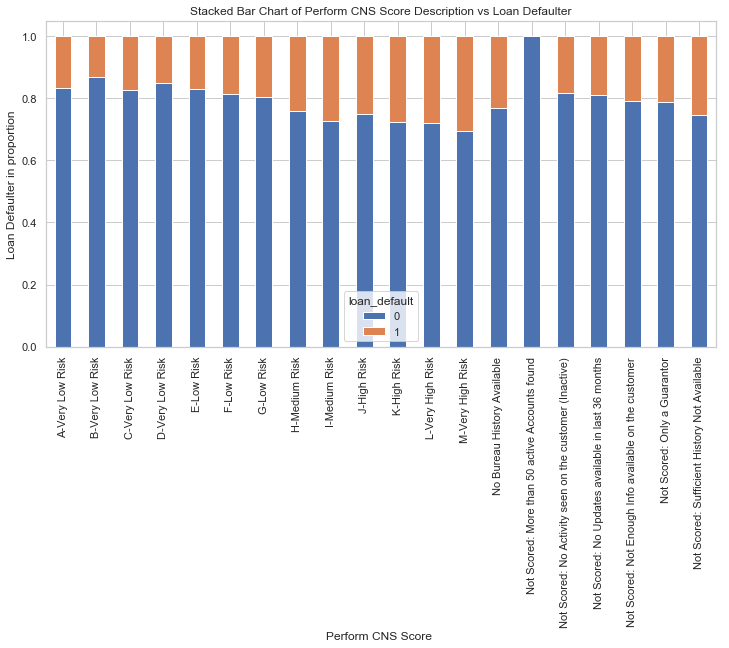

In [103]:

table=pd.crosstab(train_df['PERFORM_CNS.SCORE.DESCRIPTION'],train_df['loan_default'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(12,6))
plt.title('Stacked Bar Chart of Perform CNS Score Description vs Loan Defaulter')
plt.xlabel('Perform CNS Score ')
plt.ylabel('Loan Defaulter in proportion')

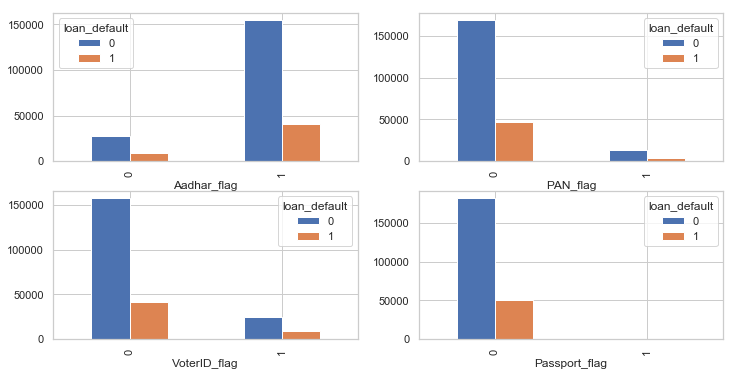

In [104]:
fig=plt.figure(figsize=(12,6))
ax=fig.subplots(2,2)
#train_df[['Aadhar_flag','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag']]
pd.crosstab(train_df['Aadhar_flag'],train_df['loan_default']).plot(kind='bar',ax=ax[0,0])
pd.crosstab(train_df['PAN_flag'],train_df['loan_default']).plot(kind='bar',ax=ax[0,1])
#'PAN_flag', 'VoterID_flag','Driving_flag', 'Passport_flag' 
pd.crosstab(train_df['VoterID_flag'],train_df['loan_default']).plot(kind='bar',ax=ax[1,0])
pd.crosstab(train_df['Passport_flag'],train_df['loan_default']).plot(kind='bar',ax=ax[1,1])


In [105]:
#train_df['CREDIT.HISTORY.LENGTH']

In [106]:
#print( [i for i in train_df.columns if i not in train_df.describe().columns])
print([i for i in test_df.columns if i not in train_df.columns])

[]


array(['03-11-18', '20-11-18', '29-11-18', '17-11-18', '21-11-18',
       '19-11-18', '18-11-18', '27-11-18', '30-11-18', '22-11-18',
       '26-11-18', '15-11-18', '09-11-18', '14-11-18', '28-11-18',
       '10-11-18', '24-11-18', '12-11-18', '16-11-18', '23-11-18',
       '13-11-18', '11-11-18', '06-11-18', '05-11-18', '08-11-18',
       '25-11-18', '07-11-18'], dtype=object)

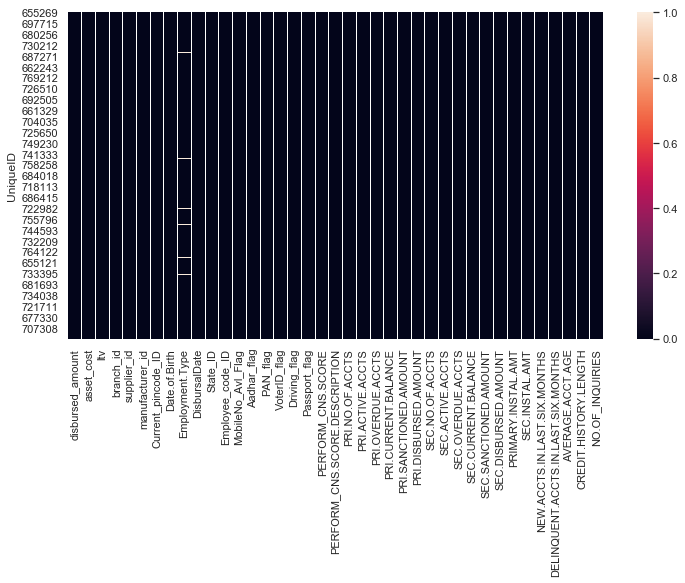

In [107]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(test_df.isnull())
test_df['DisbursalDate'].unique()

In [108]:
observed_df['loan_default'].unique()


array([0], dtype=int64)

In [109]:
len(test_df.columns)

39

In [110]:
type(train_df['AVERAGE.ACCT.AGE'])

pandas.core.series.Series

In [111]:
import math
def str_elimination(text):
    text=re.sub(r'[a-z]+','',text)
    text=re.sub(r'\s','.',text)
    x=float(text)
    try:
        t=math.floor(x)
        x=x-t
        x*=100
        month=math.floor((t*12)+x)
        return month
    except:
        month=x
        return month
train_df['AVERAGE.ACCT.AGE']=train_df['AVERAGE.ACCT.AGE'].apply(str_elimination)
train_df['CREDIT.HISTORY.LENGTH']=train_df['CREDIT.HISTORY.LENGTH'].apply(str_elimination)
test_df['AVERAGE.ACCT.AGE']=test_df['AVERAGE.ACCT.AGE'].apply(str_elimination)
test_df['CREDIT.HISTORY.LENGTH']=test_df['CREDIT.HISTORY.LENGTH'].apply(str_elimination)

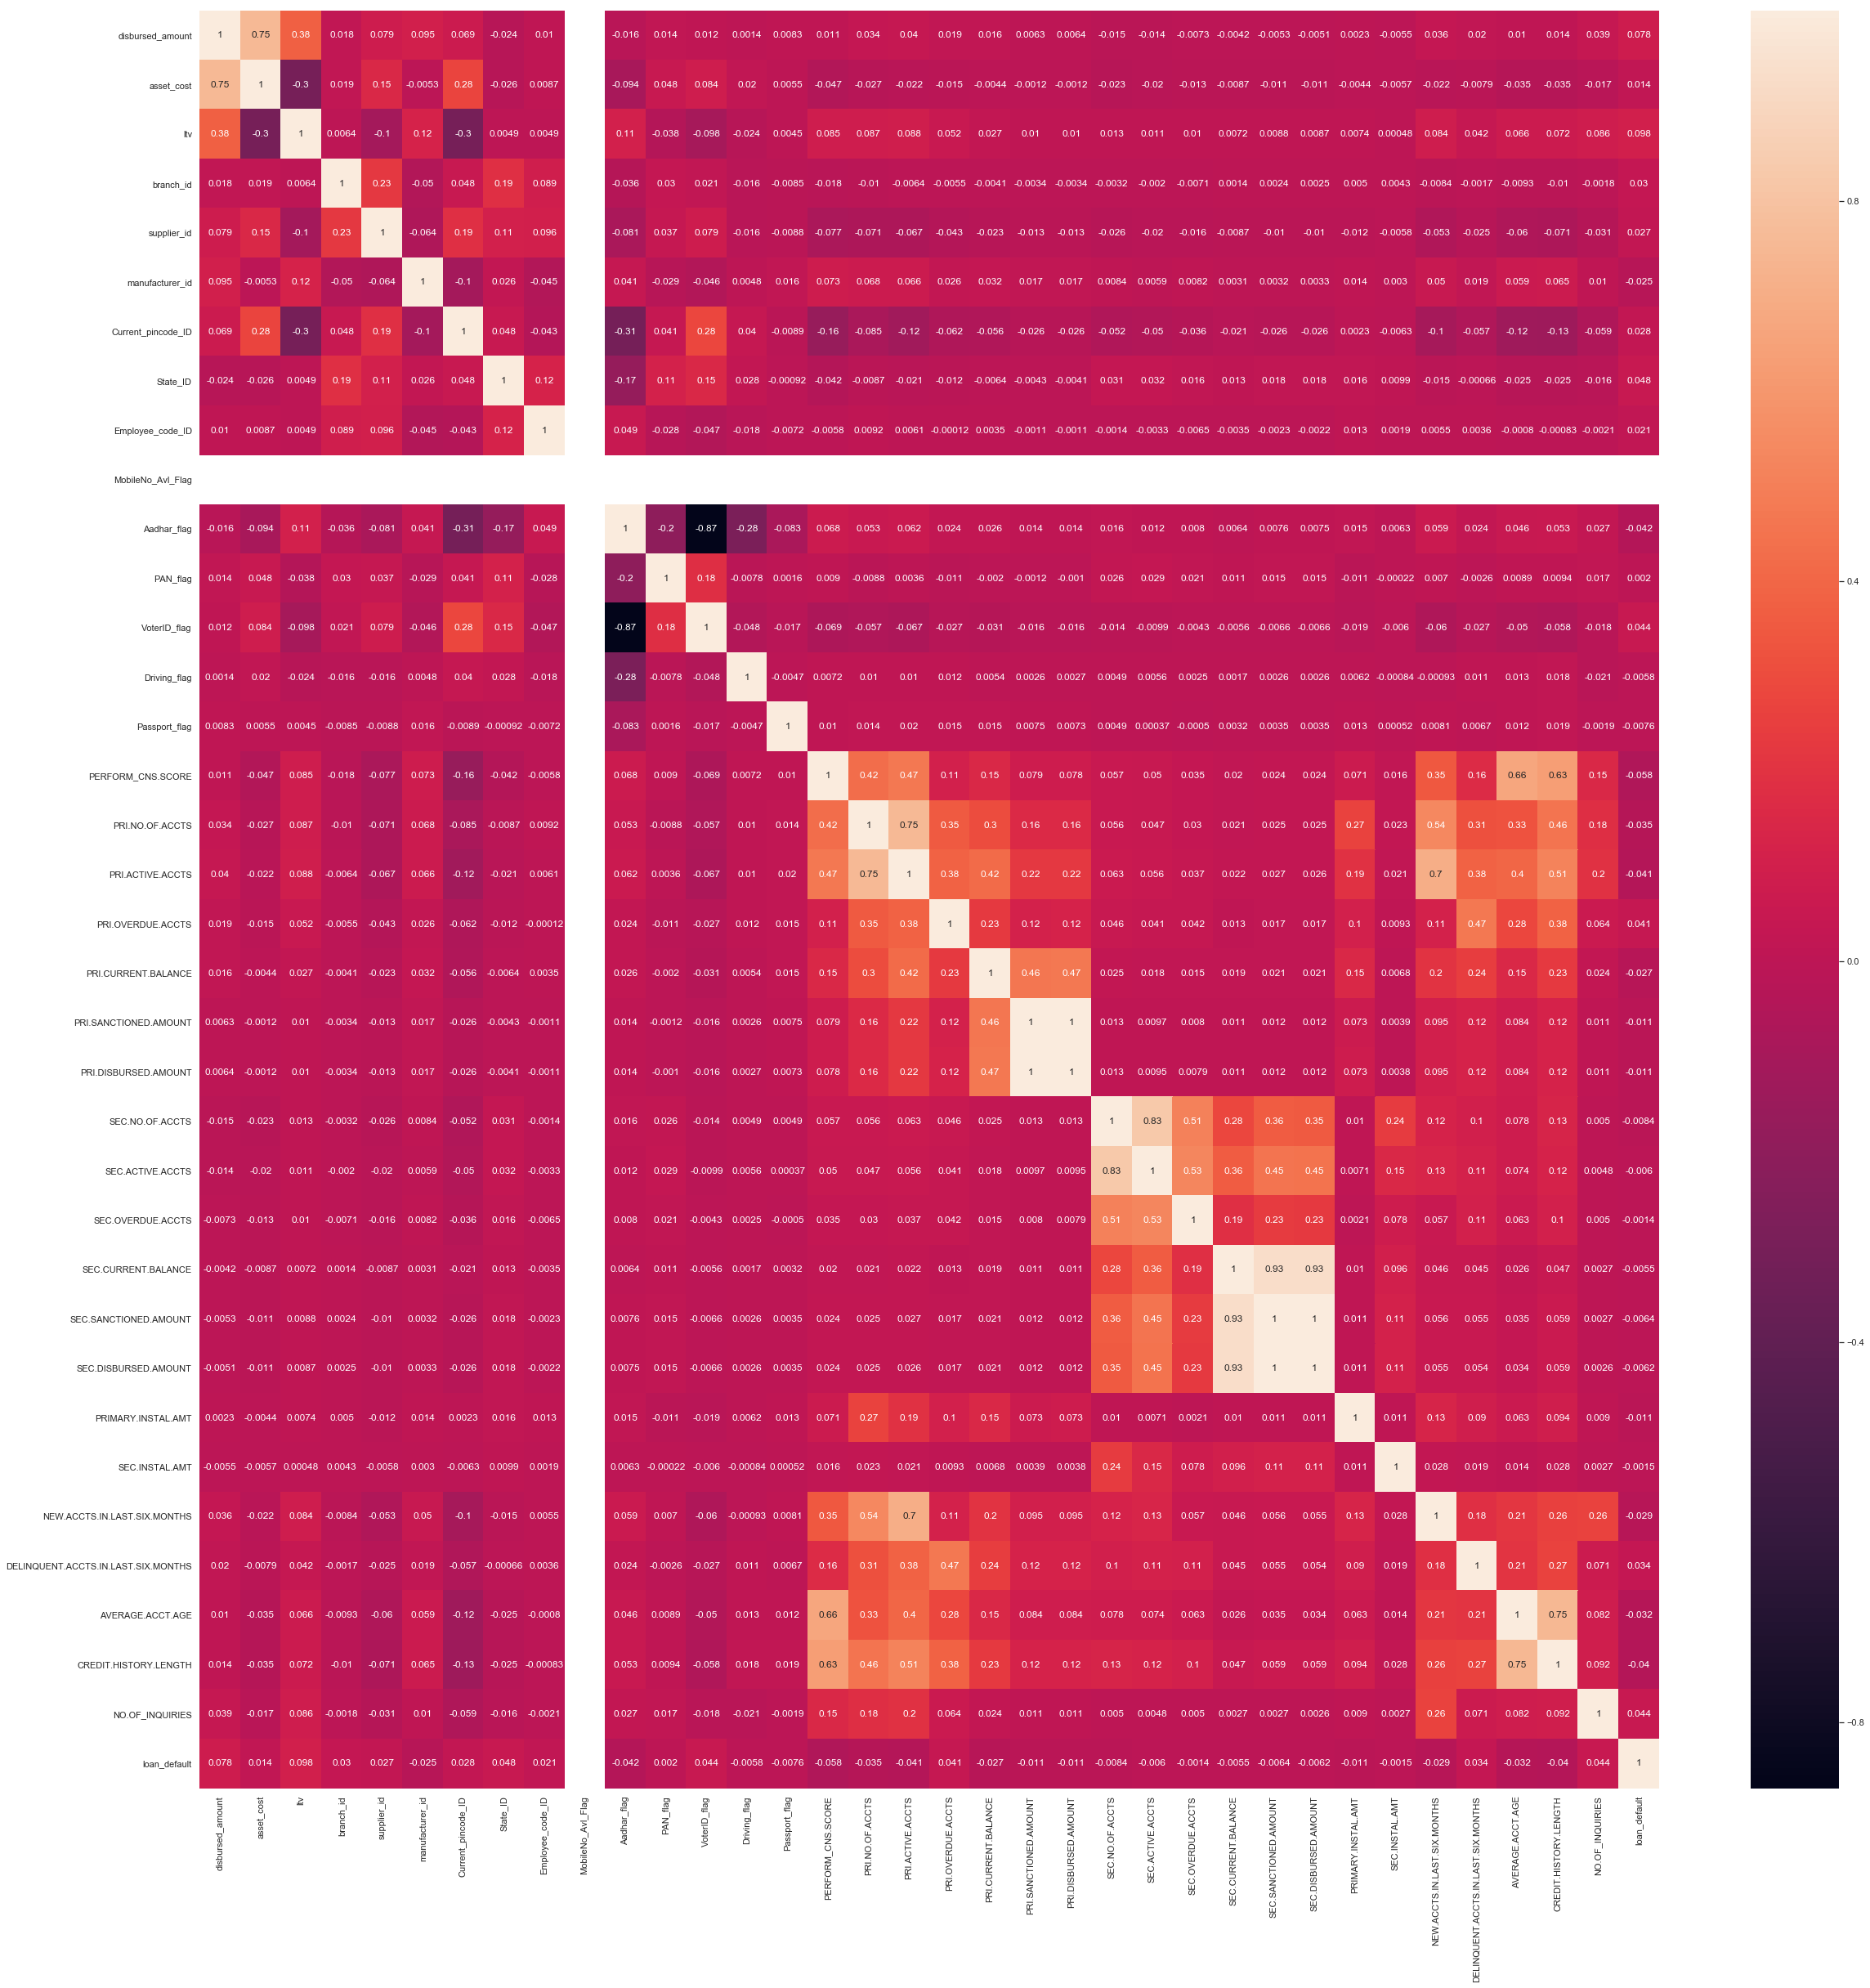

In [112]:
fig=plt.figure(figsize=(40,40))
corr=train_df.corr()
sns.heatmap(corr,annot=True)

In [113]:
len(train_df.columns)

40

In [114]:
print(train_df.shape)
test_df.shape
print([i for i in train_df.columns if i not in test_df.columns])

(233154, 40)
['loan_default']


In [115]:
train_df['Date.of.Birth']=pd.to_datetime(train_df['Date.of.Birth'])
train_df['DisbursalDate']=pd.to_datetime(train_df['DisbursalDate'])
test_df['Date.of.Birth']=pd.to_datetime(test_df['Date.of.Birth'])
test_df['DisbursalDate']=pd.to_datetime(test_df['DisbursalDate'])

In [116]:
import datetime
def cal_age(born):
    today = datetime.date.today()
    if born.year>today.year:
        return today.year - (born.year-100) - ((today.month, today.day) < (born.month, born.day))
    else:
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))



In [117]:
train_df['Age']=train_df['Date.of.Birth'].apply(cal_age)
test_df['Age']=test_df['Date.of.Birth'].apply(cal_age)
train_df['Age'].head()

UniqueID
420825    35
537409    33
417566    33
624493    25
539055    41
Name: Age, dtype: int64

In [118]:
def dis_mon(dis_month):
    today = datetime.date.today()
    if dis_month.year>today.year:
        return (today.year - (dis_month.year-100))*12 - (dis_month.month-today.month)
    else:
        return (today.year -dis_month.year)*12 - (dis_month.month-today.month)


In [119]:
train_df['Total_disbursal_month']=train_df['DisbursalDate'].apply(dis_mon)
test_df['Total_disbursal_month']=test_df['DisbursalDate'].apply(dis_mon)



[ 67  78  34 130  74  11   5  20  63  48  79   3  42 142  36  16 146 147
  65   9   1 152  29  10  70  19   7  85  61  17   8 153  18 162  68  72
  64   2 160 251 103 104 120 136  77  13 138 135  73 248  15 165  62  76
 105 249 250 255 254  82 158 159 117 202 259 207  35  69  97  43 257 258
 260 111  66 261 101  14 121 217  84 100]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


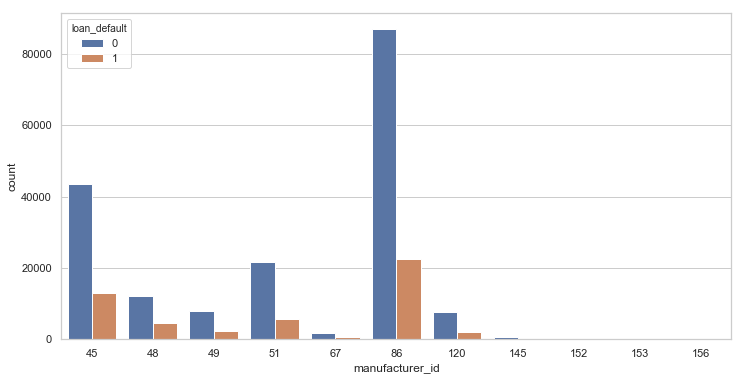

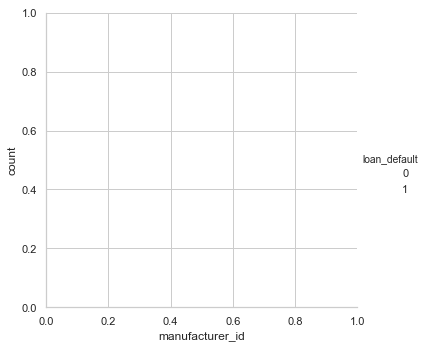

In [120]:
print(train_df['branch_id'].unique())
fig,ax=plt.subplots(figsize=(12,6))
sns.catplot(x="manufacturer_id", hue='loan_default',kind='count',data=train_df,ax=ax)
fig.show()

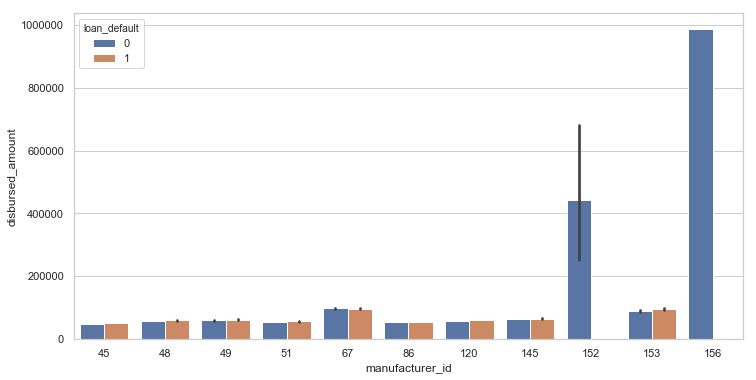

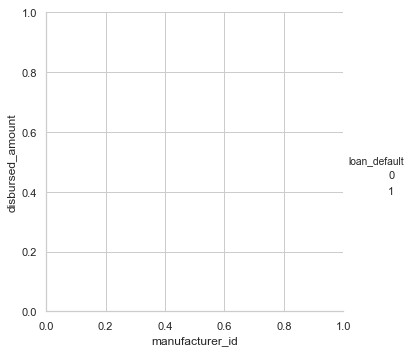

In [121]:
%matplotlib inline
fig,ax=plt.subplots(figsize=(12,6))
sns.catplot(x="manufacturer_id", y='disbursed_amount', hue='loan_default',kind='bar',ax=ax,
            data=train_df)


Text(0.5, 1.0, 'loan defaulters vs state ID')

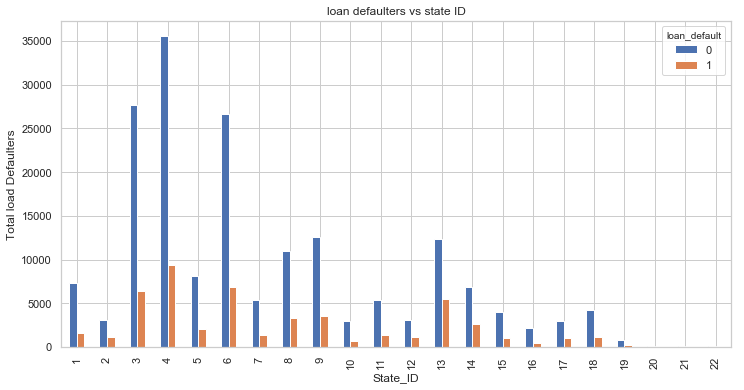

In [122]:
pd.crosstab(train_df['State_ID'],train_df['loan_default']).plot(kind='bar',figsize=(12,6),stacked=False)
plt.ylabel('Total load Defaulters')
plt.title("loan defaulters vs state ID")


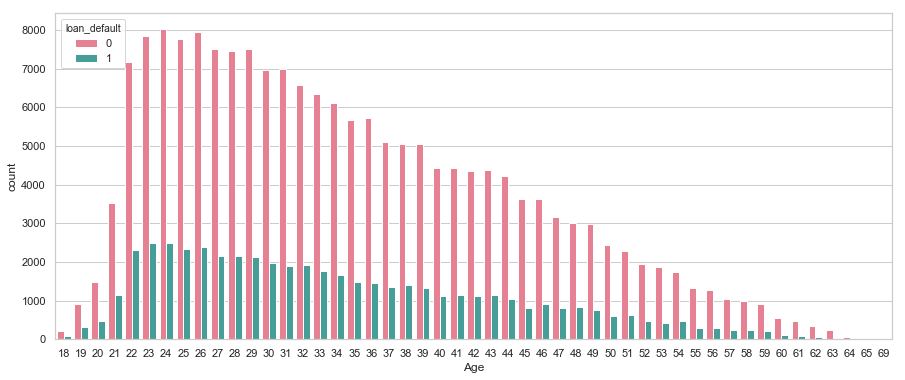

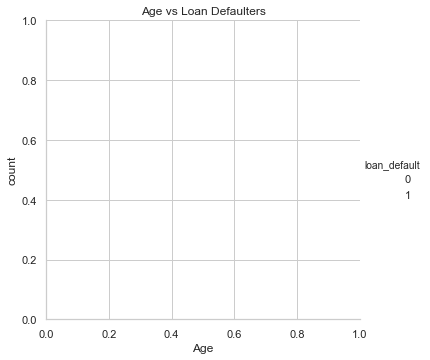

In [123]:
fig,ax=plt.subplots(figsize=(15,6))
sns.catplot(x='Age', hue='loan_default',kind='count',data=train_df,ax=ax,palette="husl",)
plt.title("Age vs Loan Defaulters")
plt.show()

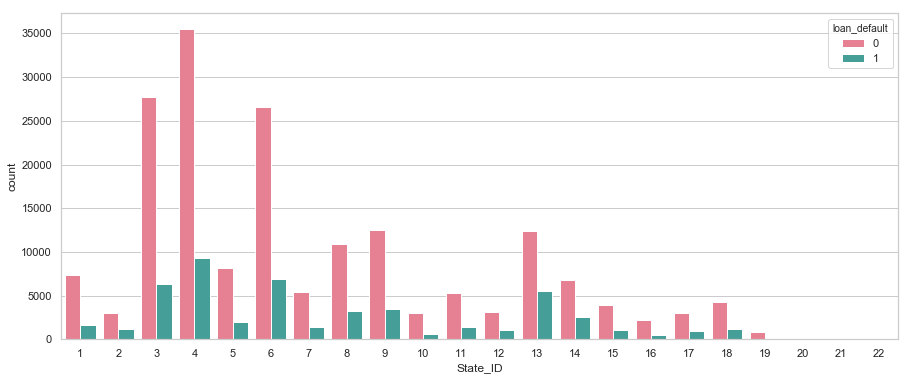

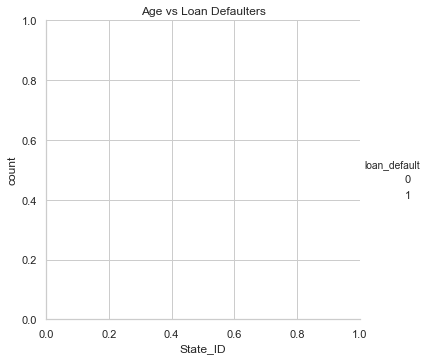

In [124]:
fig,ax=plt.subplots(figsize=(15,6))
sns.catplot(x='State_ID', hue='loan_default',kind='count',data=train_df,ax=ax,palette="husl",)
plt.title("Age vs Loan Defaulters")
plt.show()

In [125]:
print(len(train_df['PRI.CURRENT.BALANCE'].unique()))


71341


In [126]:
#def mapping(data):
#    d={}
#    for i,j in zip(data.unique(),range(len(data.unique()))):
#        d[i]=j
#    return data.map(d)

In [127]:
#train_df['Employment.Type']=mapping(train_df['Employment.Type'])
#test_df['Employment.Type']=mapping(test_df['Employment.Type'])
#train_df['PERFORM_CNS.SCORE.DESCRIPTION']=mapping(train_df['PERFORM_CNS.SCORE.DESCRIPTION'])
#test_df['PERFORM_CNS.SCORE.DESCRIPTION']=mapping(test_df['PERFORM_CNS.SCORE.DESCRIPTION'])
#train_df['manufacturer_id']=mapping(train_df['manufacturer_id'])
#test_df['manufacturer_id']=mapping(test_df['manufacturer_id'])
#train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']=mapping(train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
#test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']=mapping(test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
#train_df['NO.OF_INQUIRIES']=mapping(train_df['NO.OF_INQUIRIES'])
#test_df['NO.OF_INQUIRIES']=mapping(test_df['NO.OF_INQUIRIES'])
#train_df['Total_disbursal_month']=mapping(train_df['Total_disbursal_month'])
#test_df['Total_disbursal_month']=mapping(test_df['Total_disbursal_month'])
#train_df['branch_id']=mapping(train_df['branch_id'])
#test_df['branch_id']=mapping(test_df['branch_id'])

In [128]:
for i in [['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']]:
    train1=pd.get_dummies(train_df[i],prefix='DUM')
    test1=pd.get_dummies(test_df[i],prefix='DUM')
    train_df1=train_df.join(train1)
    train_df=train_df1
    test_df1=test_df.join(test1)
    test_df=test_df1


In [129]:
print(len(test_df.columns))
print(len(train_df.columns))

62
64


In [130]:
print([i for i in train_df if i not in test_df])

['loan_default', 'DUM_Not Scored: More than 50 active Accounts found']


In [131]:
print(len(train_df.columns))
print(len(test_df.columns))

64
62


In [132]:
train_df.drop(['Date.of.Birth','DisbursalDate'],axis=1,inplace=True)
test_df.drop(['Date.of.Birth','DisbursalDate'],axis=1,inplace=True)
train_df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','Employment.Type','MobileNo_Avl_Flag','DUM_Not Scored: More than 50 active Accounts found'],axis=1,inplace=True)
test_df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','Employment.Type','MobileNo_Avl_Flag',],axis=1,inplace=True)


In [133]:
print(len(train_df.columns))
print(len(test_df.columns))

58
57


In [134]:
X = train_df.loc[:, train_df.columns != 'loan_default']
y =train_df.loc[:, train_df.columns == 'loan_default']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, np.ravel(y_train))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['loan_default'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['loan_default']==0]))
print("Number of subscription",len(os_data_y['loan_default']==1))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['loan_default']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['loan_default']==1])/len(os_data_X))

length of oversampled data is  273862
Number of no subscription in oversampled data 136931
Number of subscription 273862
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [135]:
train_df_variable=train_df.columns.values.tolist()
y=['loan_defaults']
X=[i for i in train_df_variable if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)
rfe = RFE(model,1000)
#rfe_m = rfe.fit_transform(X_train,y_train)
rfe.fit(os_data_X,np.ravel(os_data_y))
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X =os_data_X
y=os_data_y
print(X.shape)
print(y.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

(273862, 57)
(273862, 1)
Optimization terminated successfully.
         Current function value: 0.660186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               273862
Model:                          Logit   Df Residuals:                   273805
Method:                           MLE   Df Model:                           56
Date:                Sun, 21 Apr 2019   Pseudo R-squ.:                 0.04755
Time:                        22:14:04   Log-Likelihood:            -1.8080e+05
converged:                       True   LL-Null:                   -1.8983e+05
                                        LLR p-value:                     0.000
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------

In [138]:
c=['PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT','DUM_A-Very Low Risk','DUM_B-Very Low Risk','DUM_C-Very Low Risk','DUM_E-Low Risk','DUM_E-Low Risk',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT','AVERAGE.ACCT.AGE','DUM_F-Low Risk','DUM_G-Low Risk','DUM_Not Scored: More than 50 active Accounts found'
       'DUM_H-Medium Risk','DUM_I-Medium Risk','DUM_J-High Risk','SEC.INSTAL.AMT','DUM_Salaried','DUM_K-High Risk','disbursed_amount','VoterID_flag','DUM_Not Scored: More than 50 active Accounts found','SEC.NO.OF.ACCTS',
  'NEW.ACCTS.IN.LAST.SIX.MONTHS','VoterID_flag']
cols=[i for i in X.columns if i not in c]
X_1=X[cols]
y_1=y

In [139]:
print([i for i in X_1.columns if i in y_1.columns])
y_1.columns

[]


Index(['loan_default'], dtype='object')

In [140]:
cols

['asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'Aadhar_flag',
 'PAN_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'Age',
 'Total_disbursal_month',
 'DUM_Self employed',
 'DUM_D-Very Low Risk',
 'DUM_H-Medium Risk',
 'DUM_L-Very High Risk',
 'DUM_M-Very High Risk',
 'DUM_No Bureau History Available',
 'DUM_Not Scored: No Activity seen on the customer (Inactive)',
 'DUM_Not Scored: No Updates available in last 36 months',
 'DUM_Not Scored: Not Enough Info available on the customer',
 'DUM_Not Scored: Only a Guarantor',
 'DUM_Not Scored: Sufficient History Not Available']

In [141]:
print([i for i in train_df.columns if i not in test_df.columns])

['loan_default']


In [142]:
import statsmodels.api as sm
logit_model=sm.Logit(y_1,X_1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.660661
         Iterations 5
                                               Results: Logit
Model:                            Logit                          Pseudo R-squared:               0.047      
Dependent Variable:               loan_default                   AIC:                            361929.9333
Date:                             2019-04-21 22:14               BIC:                            362298.1466
No. Observations:                 273862                         Log-Likelihood:                 -1.8093e+05
Df Model:                         34                             LL-Null:                        -1.8983e+05
Df Residuals:                     273827                         LLR p-value:                    0.0000     
Converged:                        1.0000                         Scale:                          1.0000     
No. Iterations:                   5.0000                                 

In [143]:
x_t=train_df[cols]
y_t=train_df['loan_default']

In [144]:
#print(len([i for i in train_df.columns  if i in x_1.columns]))

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1, test_size=0.25, random_state=0)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logregre = LogisticRegression(C=0.01)
logregre.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
#X_test=X_test[cols]
#len(X_test.columns)
#X_test

In [148]:
predictions = logregre.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.50      0.53     34096
           1       0.55      0.60      0.57     34370

   micro avg       0.55      0.55      0.55     68466
   macro avg       0.55      0.55      0.55     68466
weighted avg       0.55      0.55      0.55     68466



In [149]:
print(metrics.confusion_matrix(y_test,predictions))

[[17091 17005]
 [13769 20601]]


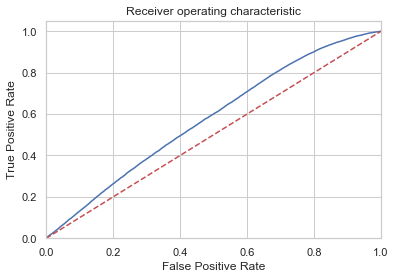

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,predictions)
fpr, tpr, thresholds = roc_curve(y_test, logregre.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('Log_ROC')
plt.show()

In [151]:
logregre.predict_proba(X_test)[:,1]

array([0.5901756 , 0.37803189, 0.62090301, ..., 0.55657414, 0.54593728,
       0.5439668 ])

In [152]:
len(predictions)
observed_df.columns

Index(['loan_default'], dtype='object')

In [153]:
#observed_df['loan_default']=predictions
#observed_df.to_csv('default_to_csv.csv')

In [154]:
test_df=test_df[cols]
test_df.shape

(112392, 35)

In [155]:
predictions2 = logregre.predict(test_df)

In [156]:
#observed_df=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\ltfs data file\\sample_submission_24jSKY6.csv",index_col="UniqueID")

In [157]:
print(classification_report(observed_df,predictions2))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    112392
           1       0.00      0.00      0.00         0

   micro avg       0.47      0.47      0.47    112392
   macro avg       0.50      0.23      0.32    112392
weighted avg       1.00      0.47      0.64    112392



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [158]:
print(metrics.confusion_matrix(observed_df,predictions2)) #112392

[[52610 59782]
 [    0     0]]


In [159]:
predicted_loan_default=pd.Series(predictions2)

In [160]:
observed_df['loan_default']=predictions2

In [161]:
observed_df.to_csv('LTFS loan default analysis_20.csv')

In [162]:
#observed_df[observed_df['predicted.loan.default_using_log_regre']==1]

In [163]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
prediction_DT=clf.predict(test_df)
print(classification_report(loan_default,prediction_DT))
print(metrics.confusion_matrix(loan_default,prediction_DT))
observed_df['loan_default']=prediction_DT
observed_df.to_csv('LTFS vehicle analysis_21.csv')

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.49      0.75      0.59     52610
           1       0.58      0.31      0.40     59782

   micro avg       0.52      0.52      0.52    112392
   macro avg       0.54      0.53      0.50    112392
weighted avg       0.54      0.52      0.49    112392

[[39635 12975]
 [41521 18261]]


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1, test_size=0.25, random_state=11)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
probs_=lda.fit(X_train, y_train).predict_proba(X_test)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
prediction_lda=lda.predict_proba(X_test)
preds=prediction_lda[:,1]
prediction_LDA=lda.predict(test_df)
print(classification_report(loan_default,prediction_LDA))
print(metrics.confusion_matrix(loan_default,prediction_LDA))
observed_df['loan_default']=prediction_LDA
observed_df.to_csv('LTFS vehicle analysis_25.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LDA classifier on training set: 0.61
Accuracy of LDA classifier on test set: 0.60
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     53718
           1       0.99      0.99      0.99     58674

   micro avg       0.99      0.99      0.99    112392
   macro avg       0.99      0.99      0.99    112392
weighted avg       0.99      0.99      0.99    112392

[[53011   707]
 [  843 57831]]


In [165]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,prediction_lda)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test,preds)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend('{}',format(logit_roc_auc))
plt.savefig('Log_ROC')
plt.show()

ValueError: bad input shape (68466, 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
prediction_gnb=gnb.predict(test_df)
print(classification_report(loan_default,prediction_gnb))
print(metrics.confusion_matrix(loan_default,prediction_gnb))
observed_df['loan_default']=prediction_gnb
observed_df.to_csv('LTFS vehicle analysis_13.csv')

In [ ]:
#train_df.columns

In [ ]:
#print(len(train_df['CREDIT.HISTORY.LENGTH'].unique()))
#print(train_df['CREDIT.HISTORY.LENGTH'].unique())

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#rfmodel=RandomForestRegressor(n_estimators=10,random_state=45)
#rfmodel.fit(X_train,np.ravel(y_train))
#prediction3=rfmodel.predict(X_test)

In [ ]:
#prediction3[prediction3>0.5]=1
#prediction3[prediction3<=0.5]=0
#prediction3

In [ ]:
prediction3=prediction3.tolist().copy()

In [ ]:
t=pd.Series(prediction3,dtype=int,copy=True,index=y_test.index)


In [ ]:
print(classification_report(t,y_test))

In [ ]:
#print(metrics.confusion_matrix(t,y_test))

In [ ]:
#loan_defaulters=rfmodel.predict(test_df)

In [ ]:
#loan_defaulters[loan_defaulters>0.5]=1
#loan_defaulters[loan_defaulters<=0.5]=0


In [ ]:
#t=loan_defaulters.tolist().copy()

In [ ]:
#random_forest_loan_defaulters=pd.Series(t,dtype=int,copy=True,index=test_df.index)

In [ ]:
#print(classification_report(loan_default,random_forest_loan_defaulters))

In [ ]:
#observed_df['loan_default']=random_forest_loan_defaulters
#observed_df.to_csv('LTFS loan default analysis_14.csv')

In [ ]:
#print(metrics.confusion_matrix(loan_default,random_forest_loan_defaulters))


In [ ]:
#importances = list(rfmodel.feature_importances_)

In [ ]:
#d={}
#for feature, importance in zip(X_train.columns, importances):
#    d[feature]=round(importance,2)

In [ ]:
#important_feature=[i for i in d.keys() if d[i]>0.0]
#type(important_feature)

In [ ]:
#rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=65)

In [ ]:
#X_train=X_train[important_feature]
#X_test=X_test[important_feature]
#y_train=y_train[important_feature]

In [ ]:
#rf_most_important.fit(X_train,y_train)

In [ ]:
#predictions4 = rf_most_important.predict(X_test)

In [ ]:
##predictions4


In [ ]:
#predictions4[predictions4>0.5]=1
#predictions4[predictions4<=0.5]=0
#len(predictions4)

In [ ]:
#predictions4=predictions4.tolist().copy()
#t_1=pd.Series(predictions4,dtype=int,copy=True,index=y_test.index)
#random_forest_loan_default=pd.Series(t_1,dtype=int,copy=True,index=X_test.index)
#print(classification_report(y_test,random_forest_loan_default))


In [ ]:
#print(metrics.confusion_matrix(y_test,random_forest_loan_default))


In [ ]:
#random_forest_loan_defaulter_last=rf_most_important.predict(test_df[important_feature])

In [ ]:
#random_forest_loan_defaulter_last[random_forest_loan_defaulter_last>0.5]=1
#random_forest_loan_defaulter_last[random_forest_loan_defaulter_last<=0.5]=0
#len(random_forest_loan_defaulter_last)

In [ ]:
#random_forest_loan_defaulter_last=random_forest_loan_defaulter_last.tolist().copy()
#t_1=pd.Series(random_forest_loan_defaulter_last,dtype=int,copy=True,index=observed_df.index)
#random_forest_loan_defaulter_last=pd.Series(t_1,dtype=int,copy=True,index=observed_df.index)
#print(classification_report(observed_df['loan_default'],random_forest_loan_defaulter_last))

In [ ]:
#print(metrics.confusion_matrix(observed_df['loan_default'],random_forest_loan_defaulter_last))

In [ ]:
#observed_df['loan]=random_forest_loan_defaulter_last

In [ ]:
#'''fig=plt.figure(figsize=(12,6))
#plt.bar(d.keys(),d.values())
#plt.xticks(rotation=90)
#plt.xlabel('variable names ')
#plt.ylabel('Weight of variable in analysis')
#plt.title("Weight of variables vs variable names")
#plt.show()'''

In [ ]:
#observed_df.to_csv('LTFS loan default analysis_7.csv')